<a href="https://colab.research.google.com/github/andylovecloud/Data/blob/main/GroupHCDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Data Science Wages Analytics, 2022-2023 (Team HCDD)

# Introduction & Objective

We selected dataset from Kaggle: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023 on 15 Nov 2023. The information this dataset was most likely gathered by scraping job postings from ai-jobs.net.

We aim to use this dataset to analyze salaries for various data science roles, factoring in key variables like experience, job specifics and scale of company. This offers insights into potential earnings across different domains that influence data science salaries. For example, we would use it to address the following questions:

1. Which are the top 10 jobs with the highest mean salary for juniors (entry-level) in 2023?
2. What are the top 5 poppular job titles in 2022 and 2023?
3. What is the average salary of each job title in small-sized companies in the US?
4. How does the average income for the 'Data Scientist' job vary by experience level?

# 1. Data Preprocessing

### Data Exploration

The purpose of these steps is help to import data from raw data (Kaggle), quick review and verify the quality.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # To ignore the deprecation warning when replacing values
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', DeprecationWarning)


In [ ]:
# Load raw data
from google.colab import data_table
url = 'https://raw.githubusercontent.com/hiephamk/Data_Analysis/main/ds_salaries.csv'
salary = pd.read_csv(url,sep = ',')

In [ ]:
# Preview the first 5 lines of the loaded data
salary.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
# View a random dataset of data
sample = salary.sample(5)
sample

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1610,2023,SE,FT,Data Engineer,129000,USD,129000,US,0,US,M
2005,2022,SE,FT,Machine Learning Engineer,246000,USD,246000,US,100,US,M
1716,2023,SE,FT,Data Scientist,170000,USD,170000,US,100,US,M
2182,2022,SE,FT,Data Analyst,100000,USD,100000,US,0,US,M
3426,2022,EN,FT,Data Scientist,1400000,INR,17805,IN,100,IN,M


Now we need to know how many rows and columns are there in the data set, what variables it has and the data types of the variables.

In [ ]:
# Viewing data type and getting the total number of rows and columns
print(salary.info())
salary.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


(3755, 11)

As we can see from the above data frame information, there are 3755 rows, 11 columns, and no missing values in this dataset since all fields have 3755 non-null entries.

However, we could check again to assure if there are some missing values in the data set.

In [ ]:
# Check missing values
missing_values = salary.isnull().sum()
print(missing_values)

# Calculate the missing percentage
total_values = np.product(salary.shape)
percentage = (missing_values / total_values) * 100
print(percentage)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64


As per the above result, we now can ensure that **our data set has no missing value.**

### Data Transformation

#### **Unnecessary data drop**

Firstly, let us start by counting the number of entries in each nation.

In [ ]:
# Count the number of entries in each country
salary['company_location'].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

Out of 3,755 observations, 3,040 data values are from the US and these will significantly contribute in our analytics. Thus, we opted to retain only data from the US and exclude data from other nations.

In [ ]:
# Filter data values to keep the US country only
df_salary1 = salary[salary['company_location'] == 'US']
df_salary1.shape

(3040, 11)

Now since we only have one country in the data, we no longer need 2 features "company_location" and "employee_residence", so we will drop them for a cleaner data set.

Besides, the "salary" and "salary_currency" features will also be removed. We saw that there are 3 features relevant to salary: "salary", "salary_currency", and "salary_in_usd". However, we will primarily focus on the "salary_in_usd" feature because it provides a standardized currency for simple comparisons.

In [ ]:
# Drop 2 columns 'company_location' and 'employee_residence'
df_salary2 = df_salary1.drop(columns=['company_location', 'employee_residence'])
df_salary2.shape

(3040, 9)

In [ ]:
# Drop 2 columns: 'salary' and 'salary_currency'
df_salary3 = df_salary2.drop(['salary','salary_currency'], axis=1)
df_salary3.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
1,2023,MI,CT,ML Engineer,30000,100,S
2,2023,MI,CT,ML Engineer,25500,100,S
5,2023,SE,FT,Applied Scientist,222200,0,L
6,2023,SE,FT,Applied Scientist,136000,0,L
9,2023,SE,FT,Data Scientist,147100,0,M


In [ ]:
# Check the number of rows and columns of the latest dataset
df_salary3.shape

(3040, 7)

As observed, there are limited number of data values for the year 2020, 2021 ( 131 out of 3,040 observations) in the latest data set. These data may not contribute significantly to our analytics, so we will exclude it in the final data set.

In [ ]:
# Filter data without values of years 2020 and 2021
df_salary = df_salary3[(df_salary3['work_year'] != 2020) & (df_salary3['work_year'] != 2021)]
df_salary.shape

(2909, 7)

After this filter, our data set now has **2909 rows and 7 columns** in total.

#### **Duplicated values**

We are going to identify and remove duplicated values (if any) in order to smooth our data set.

In [ ]:
# Check duplicate values
dup_value = df_salary.duplicated()

# Find the number of duplicate values
dup_value_count = dup_value.value_counts()
dup_value_count

False    1798
True     1111
dtype: int64

The result shows that there are **1111 duplicated entries** in our **final dataset**.

Before dropping them, we will display some of these duplicated values to see if they are valid to assure that we don't make any mistake here.

In [ ]:
# Show some rows of duplicate values to investigate
df_salary[dup_value].head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
115,2023,SE,FT,Data Scientist,150000,0,M
123,2023,SE,FT,Analytics Engineer,289800,0,M
153,2023,MI,FT,Data Engineer,100000,100,M
154,2023,MI,FT,Data Engineer,70000,100,M
160,2023,SE,FT,Data Engineer,115000,0,M
163,2023,SE,FT,Applied Scientist,309400,0,L
164,2023,SE,FT,Applied Scientist,159100,0,L
167,2023,MI,FT,Data Engineer,162500,0,M
168,2023,MI,FT,Data Engineer,130000,0,M
171,2023,SE,FT,Data Engineer,145000,0,M


After manually examining the above duplicated values, we found that ***each of the duplicates had unique values in the "salary_in_usd"*** feature. Hence, we concluded that all of these duplicate entries are invalid observations, and **none of them will be removed**.

#### **Distinct values**

In [ ]:
# We would like to check & view the distinct values in each of columns
unique_counts = df_salary.nunique(axis=0)
unique_values_list = []
for col_name in unique_counts.index:
        values_get = df_salary[col_name].unique()
        unique_values_list.append(values_get)
df_distinct = pd.DataFrame({'Column_name': unique_counts.index, 'Distinct_values_count': unique_counts.values, 'Values_range': unique_values_list})
df_distinct


,Column_name,Distinct_values_count,Values_range
0,work_year,2,"[2023, 2022]"
1,experience_level,4,"[MI, SE, EN, EX]"
2,employment_type,4,"[CT, FT, PT, FL]"
3,job_title,61,"[ML Engineer, Applied Scientist, Data Scientis..."
4,salary_in_usd,645,"[30000, 25500, 222200, 136000, 147100, 90700, ..."
5,remote_ratio,3,"[100, 0, 50]"
6,company_size,3,"[S, L, M]"


#### **Replace values**
According to the above distinct values and source inspection, we can decribe the distinct values of several fields as following:

**1. Experience Level:** 4 unique values
- EN: Entry-level / Junior
- MI: Mid-level / Intermediate
- SE: Senior-level / Expert
- EX: Executive-level / Director

**2. Employee Type:** 4 categories
- PT: Part-time
- FT: Full-time
- CT: Contract
- FL: Freelance

**3. Remote Ratio:** 3 numerical values
- 0: Office work
- 50: Partial remote
- 100: Fully remote

**4. Company Size:** 3 unique values
- S: Small-sized company
- M: Medium-sized company
- L: Large-sized company

Now let's replace these abbreviations with the descriptions for easy understanding.

In [ ]:
# Replace the abbreviations
df_salary['experience_level'] = df_salary['experience_level'].replace(['EN','MI','SE','EX'], ['Entry-level','Mid-level','Senior','Executive'])
df_salary['employment_type'] = df_salary['employment_type'].replace(['FT','PT','CT','FL'], ['Full-time','Part-time','Contract','Freelance'])
df_salary['remote_ratio'] = df_salary['remote_ratio'].replace([0,50,100], ['Office work','Partial remote','Fully remote'])
df_salary['company_size'] = df_salary['company_size'].replace(['S', 'M', 'L'], ['Small', 'Medium', 'Large'])

In [ ]:
# Show 5 first rows of the final data set after replacing
df_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
1,2023,Mid-level,Contract,ML Engineer,30000,Fully remote,Small
2,2023,Mid-level,Contract,ML Engineer,25500,Fully remote,Small
5,2023,Senior,Full-time,Applied Scientist,222200,Office work,Large
6,2023,Senior,Full-time,Applied Scientist,136000,Office work,Large
9,2023,Senior,Full-time,Data Scientist,147100,Office work,Medium


#### **Outlier detection**

There are several ways for oulier detection. We will use two methods to identify outliers: Boxplot and IQR.
We need to identify ouliers because it may indicate bad data.

First, we use Boxplot to get an visual overview of any outliers. A Box Plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.

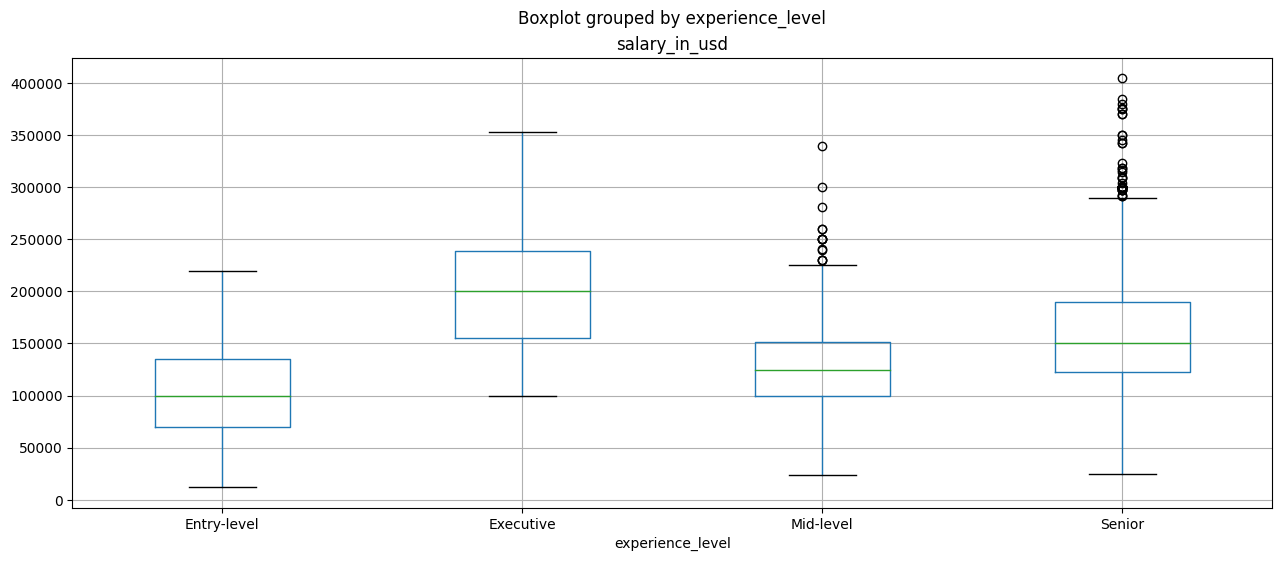

In [ ]:
# Define outliers by using Boxplot
df_salary.boxplot(column='salary_in_usd', by='experience_level', figsize=(15,6))
plt.show()

We can also calculate the outliers ​​using the IQR (Interquartitle Range) method.

In [ ]:
# Define outliers by IQR
q25 = np.percentile(df_salary.salary_in_usd, 25)
q75 = np.percentile(df_salary.salary_in_usd, 75)
IQR = q75 - q25
IQR # Print IQR (Inter Quartile Range) values

70000.0

In [ ]:
# Calculate Upper/Lower to identify outliers with threshold is 1.5
limit_iqr = 1.5*IQR
lower_iqr = q25 - limit_iqr
upper_iqr = q75 + limit_iqr
print(lower_iqr)
print(upper_iqr)

10000.0
290000.0


In [ ]:
# The range of outliers should be lower than (<) "lower_iqr " and higher than (>) " > upper_iqr"
outliers = df_salary[(df_salary['salary_in_usd'] < lower_iqr) | (df_salary['salary_in_usd'] > upper_iqr)]
outliers.shape

(58, 7)

For more accurate analytics, we would exclude 58 outliers from our dataset whose salary values are either less than USD10,000 or considerably greater than USD290,000.

In [ ]:
# Create new frame for the final dataset
salary_final = df_salary[(df_salary['salary_in_usd'] > lower_iqr) & (df_salary['salary_in_usd'] < upper_iqr)]
salary_final.shape

(2850, 7)

In [ ]:
salary_final.head(20)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
1,2023,Mid-level,Contract,ML Engineer,30000,Fully remote,Small
2,2023,Mid-level,Contract,ML Engineer,25500,Fully remote,Small
5,2023,Senior,Full-time,Applied Scientist,222200,Office work,Large
6,2023,Senior,Full-time,Applied Scientist,136000,Office work,Large
9,2023,Senior,Full-time,Data Scientist,147100,Office work,Medium
10,2023,Senior,Full-time,Data Scientist,90700,Office work,Medium
11,2023,Senior,Full-time,Data Analyst,130000,Fully remote,Medium
12,2023,Senior,Full-time,Data Analyst,100000,Fully remote,Medium
13,2023,Entry-level,Full-time,Applied Scientist,213660,Office work,Large
14,2023,Entry-level,Full-time,Applied Scientist,130760,Office work,Large


**Finally, our dataset now has 2850 rows and 7 columns which will be mainly used for the statistics and visualization.**

#### **Bins**

We decide using "salary_in_usd" feature to do bining since this column represents the salaries in USD, and grouping these numerical values into discrete categories will be useful to have an overview of the salary range.

Before creating the salary bins, we need to know its minimum and maximum amount so that we can determine the first and last value of the bin.

In [ ]:
# Get the minimum salary by calling function min ()
min_salary = salary_final['salary_in_usd'].min()
min_salary

In [ ]:
# Get the maximum salary by calling function max ()
max_salary = salary_final['salary_in_usd'].max()
max_salary

Then, we start creating the salary bin using cut function.

In [ ]:
# Divide the 'salary_in_usd' column into 5 bins with labels
bins = [12000,50000,100000,150000,200000,300000]
labels = ['12k-50k','50k-100k','100k-150k','150k-200k','200k-300k']
salary_range_bins = pd.cut(salary_final['salary_in_usd'], bins = bins, labels = labels, right = False)
salary_range_bins

In [ ]:
# Let's count the values of each bin
pd.value_counts(salary_range_bins)

#2. Data Objects & Attribute Types

To get started, we created a function that prints the data attributes as a list for a clean and nice appearance.

In [ ]:
def Data_print_as_List(input_data):
  for i, col in enumerate(input_data):
    print(i,col)

### **Identify and print nominal attributes**


Because nominal attributes are typically the most common in our final dataframe, we should apply exclusion methods.

In [ ]:
# Print norminal attributes
print("List of Nominal Atributes:\n")
Nominal_col = salary_final.loc[:, ~df_salary.columns.isin(['salary_in_usd', 'company_size', 'experience_level'])] # exclusing other columns
Data_print_as_List(Nominal_col)

###  **Identify and print binary attributes**

A binary attribute can only have two possible values (0 or 1, true or false, on or off...). To define binary attributes, we can manually examine the data frame.

In [ ]:
df_distinct

From the above output, we can see that there are no columns which contains only two different values as (0,1) or (True, False). So we can conclude that the dataframe has no binary distributes on it.

Or we can check it again by using code to list the columns automatically.

In [ ]:
# List binary attribute columns which has values as (0,1) or (True,False)
Binary_col = salary_final.columns[df_salary.isin([0, 1]).all()]

# Print the result
if not Binary_col.empty:
    print("List of Binary Atributes:\n")
    Data_print_as_List(Binary_col)
else:
    print("There are no binary columns in the data frame.")

**Hence, we conclude that there is no binary attribute in this data set.**

### **Identify and print ordinal attributes**

We observed that the "experience_level" column may be an ordinal attribute because it indicates the range of experience levels.

Additionally, the "company_size" column may be an ordinal attribute since it reflects the company's size (small, medium, or large).

In [ ]:
# Get ordinal attributes
print("List of Ordinal Atributes:\n")
Ordinal_col = salary_final[['experience_level','company_size']]
Data_print_as_List(Ordinal_col)

Because the values of these two columns are of the string type, they will be returned in alphabetical order, preventing us from sorting them in the right manner. So now we need to adjust the order for the values of those columns.

In [ ]:
# Set order for "experience_level" values, assending == True
ordinal_order = ['Entry-level','Mid-level','Senior','Executive']

# Print the order and its type
salary_final['experience_level'] = salary_final['experience_level'].astype(pd.CategoricalDtype(categories=ordinal_order, ordered=True))
salary_final.experience_level.dtype

In [ ]:
# Set order for "company_size" values, assending == True
ordinal_order = ['Small','Medium','Large']

# Print the order & its type
salary_final['company_size'] = salary_final['company_size'].astype(pd.CategoricalDtype(categories=ordinal_order, ordered=True))
salary_final.company_size.dtype

###  **Identify and print numerical attributes**

The "salary_in_usd" has an int64 type and could be calculated, hence it must be a numerical attribute.


In [ ]:
# Print the numberical attributes
print("Numerical Atribute:\n")
Numerical_columns = salary_final[['salary_in_usd']]
Data_print_as_List(Numerical_columns)


In [ ]:
Numerical_columns.describe()

#3. Statistics & Visualization

Before deep diving into the statistics and visualizations relevant to our four questions, let us first understand some basic statistics about our dataset.

In [ ]:
# Calculate basic statistics
actual_mean_salary = np.mean(salary_final['salary_in_usd'])
actual_median_salary = np.median(salary_final['salary_in_usd'])
actual_std_dev_salary = np.std(salary_final['salary_in_usd'], ddof=1)
actual_variance_salary = np.var(salary_final['salary_in_usd'], ddof=1)
actual_min_salary = np.min(salary_final['salary_in_usd'])
actual_max_salary = np.max(salary_final['salary_in_usd'])
actual_total_salary = np.sum(salary_final['salary_in_usd'])

# Add explanations for each statistic
actual_stats_explanations = {
    "Mean Salary \t\t": (actual_mean_salary, "Average salary across all entries."),
    "Median Salary \t\t": (actual_median_salary, "Middle salary value, robust against outliers."),
    "Standard Deviation \t": (actual_std_dev_salary, "Variability of salary distribution."),
    "Variance \t\t": (actual_variance_salary, "Measure of salary distribution spread."),
    "Minimum Salary \t\t": (actual_min_salary, "Lowest salary in the dataset."),
    "Maximum Salary \t\t": (actual_max_salary, "Highest salary in the dataset."),
    "Total Salary \t\t": (actual_total_salary, "Sum of all salaries, useful for budgeting.")
}

# Print each statistic with its explanation
for stat, (value, explanation) in actual_stats_explanations.items():
    print (stat + " : " + str(int(value)) + " \t-   " + explanation)

### Q1. Top 10 Jobs with the Highest Mean Salary for Juniors in 2023

**Approach**:
Filter the dataset for entries where `experience_level` is 'Entry-level' and `work_year` is '2023'. Then group these entries by average of `salary_in_usd` and get the top 10.

**Visualization**:
Create a bar chart showing the job titles on the x-axis and the average salaries on the y-axis.

In [ ]:
# Filter the DataFrame for junior level
junior_2023 = salary_final[(salary_final['experience_level'] == 'Entry-level') & (salary_final['work_year'] == 2023)]

# Group by the largest mean salary of top 10 job titles
top10_junior_jobs = junior_2023.groupby('job_title')['salary_in_usd'].mean().nlargest(10)
top10_junior_jobs

In [ ]:
# Visualize by Bar chart
plt.title('Top 10 Jobs with the Highest Salary for Juniors in 2023')
top10_junior_jobs.plot(kind='bar')
plt.show()

### Q2. Top 5 Popular Jobs in 2022 and 2023

**Approach**:
Filter the dataset for the years 2022 and 2023, then count the frequency of each `job_title`.

**Visualization**:
A bar chart and a pie chart to show top 5 job titles and their entries counts.

In [ ]:
# Filter for year 2022, 2023
recent_years = salary_final[salary_final['work_year'].isin([2022, 2023])]

# Group by job titles and 5 largest entries count
popular_job_titles = recent_years['job_title'].value_counts().nlargest(5)
popular_job_titles

In [ ]:
# 2.1 Visualize by Bar chart
# Create index to display on y axis
top_job_index= recent_years['job_title'].value_counts().head(5).index

# Plot the data & show the plot
plt.figure(figsize=(8, 5))
sns.countplot(y='job_title', data=recent_years, order=top_job_index)
plt.title('Top 5 Popular Job Titles in 2022-2023')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

In [ ]:
print(top_job_index)

In [ ]:
# 2.2 Visualize by Pie chart (using the same result as above)
popular_job_titles.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Top 5 Popular Jobs in 2022 and 2023 (by percentage)')
plt.show()

### Q3. Average Salary of Each Job Title in Small-Sized Companies in the US

**Approach**:
Filter for 'small-sized' companies and group by `job_title` to calculate the mean `salary_in_usd` for each job title.

**Visualization**:
We will show a bar chart, heatmap and a line plot chart with job titles and their corresponding mean salaries.

In [ ]:
# Filter the DataFrame for small-sized companies
small_companies = salary_final[(salary_final['company_size'] == 'Small')]

# Group by job title and calculate the mean salary for each job title
mean_salary_by_title = small_companies.groupby('job_title')['salary_in_usd'].mean()

# Sort the average salaries
mean_salary_by_title_sort = mean_salary_by_title.sort_values(ascending=True)
mean_salary_by_title_sort

In [ ]:
# 3.1 Visualize by Bar chart
plt.figure(figsize=(8, 5))
plt.barh(mean_salary_by_title.index[::-1], mean_salary_by_title_sort, color='#1874CD')
plt.xlabel('Average Salary (in USD)')
plt.ylabel('Job Title')
plt.title('Average Salary by Job title in Small-sized US Companies')
plt.tight_layout()
plt.show()

In [ ]:
# 3.2 Visualize by Heatmap chart (using the same result as above)
# Create a DataFrame for a Heatmap
heatmap_data = pd.DataFrame({
    'Job Title': mean_salary_by_title.index,
    'Small Company': 'Small Company',
    'Mean Salary': mean_salary_by_title.values
})

# Create a pivot table for the Heatmap
heatmap_pivot = heatmap_data.pivot("Small Company", "Job Title", "Mean Salary")

# Plot the Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_pivot, yticklabels=False, annot=True, fmt=".0f", cmap='viridis', linewidths=.5)
plt.title('Average Salary by Job title in Small-sized US Companies')
plt.show()

In [ ]:
# 3.3 Visualize by Line plot chart (using the same result as above)
plt.figure(figsize=(14, 5))
plt.plot(mean_salary_by_title.index, mean_salary_by_title.values, marker='o')
plt.xticks(rotation=80)
plt.xlabel('Job Title')
plt.ylabel('Mean Salary in USD')
plt.title('Average Salary by Job title in Small-sized US Companies')
plt.show()


### Q4. Average Income for the Data Scientist Job by Experience Level

**Approach**:
Filter for 'Data Scientist' positions and group by `experience_level` to calculate the mean `salary_in_usd`.

**Visualization**:
Use a histogram chart to show salary range of this job and a 3D chart to show the different experience levels on the x-axis and the average salaries on the y-axis.

In [ ]:
# Filter for 'Data Scientist' positions
data_scientist_salaries = salary_final[salary_final['job_title'] == 'Data Scientist']

# Group by experience level and calculate the mean salary
income_by_experience = data_scientist_salaries.groupby('experience_level')['salary_in_usd'].mean()
income_by_experience

In [ ]:
# 4.1 Visualize by Histogram chart
plt.hist(data_scientist_salaries['salary_in_usd'], bins=20, color='skyblue', edgecolor='white')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.title('Distribution of Salaries for Data Scientists')
plt.show()

In [ ]:
# 4.2 Visualize by 3D chart (using the same result as above)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(len(income_by_experience.index))
y = np.zeros(len(income_by_experience.index))
z = np.zeros(len(income_by_experience.index))
dx = np.ones(len(income_by_experience.index))
dy = np.ones(len(income_by_experience.index))
dz = income_by_experience.values
ax.bar3d(x, y, z, dx, dy, dz, color='c', edgecolor='white')
ax.set_xticks(x)
ax.set_xticklabels(income_by_experience.index)
ax.set_xlabel('Experience Level')
ax.set_yticks([]) # Disable lablel on y axis
ax.set_ylabel('')
ax.set_zlabel('Average Salary in USD')
ax.set_title('Average Income for Data Scientist by Experience Level')
plt.show()


# Conclusion

Our analysis of the 2022-2023 data science wages, using the Kaggle dataset, has led to several key insights:

1. **[Top 10 Jobs with Highest Mean Salary for Juniors in 2023](https://colab.research.google.com/drive/1jhTycUzPYroREp6-OQRwUaLH7dXwEIwi#scrollTo=22-A1nP3_Arb&line=1&uniqifier=1)**: We observed that the lowest average salary for Data Scientists is 73,665 USD, while the average salary for Data Engineers at this level is 101,000 USD. And in the Entry-level category, the average salary for Data Engineers is higher than that of Data Scientists, indicating that there is a higher demand or value associated with the skills of a Data Engineers compared to a Data Scientist at this experience level.

> *For job candidates who value a better starting income, we would recommend them consider starting their career as a Data Engineer rather than a Data Scientist role, especially when starting at the Entry Level/Junior level.*

2. **[Top 5 Popular Job Titles in 2022 and 2023](https://colab.research.google.com/drive/1jhTycUzPYroREp6-OQRwUaLH7dXwEIwi#scrollTo=ewZeif7N9unm&line=1&uniqifier=1)**: Upon examining the statistics, it is obvious that jobs such as 'Data Scientist' and 'Data Engineer' are in high demand. The data indicates that the industry is riding the wave of technological advancements. And it is like a sneak peek into future employment trends.

3. **[Mean Salary by Job Title in Small-Sized US Companies](https://colab.research.google.com/drive/1jhTycUzPYroREp6-OQRwUaLH7dXwEIwi#scrollTo=c17lKP4yvmjI&line=1&uniqifier=1)**: Based on the statistics and visualization, we can see a significant variation in salaries across different job titles, especially the 'AI Scientist' role standing out with the highest average salary at $200,000 USD. Within the data science field, individuals with this specific role as well as 'Data Science Lead' tend to earn the greatest compensation in small-sized US companies.

> *Given the high earning potential in this role, a career as an AI Scientist could be a promising path for job seekers hoping to land a well-compensated position.*

4. **[Average Income for 'Data Scientist' by Experience Level](https://colab.research.google.com/drive/1jhTycUzPYroREp6-OQRwUaLH7dXwEIwi#scrollTo=hUPDtTuuMW-u&line=3&uniqifier=1)**:
According to the Histogram chart, we could see that the majority of 'Data Scientist' professionals earn between $100,000 and 200,000 USD. Besides, the 3D chart shows that as professionals gain more experience, their salaries tend to rise.

> *Recognizing the variations in salaries at different experience levels helps job seekers make informed choices in their career path, and they can set clear objectives for career progression based on their desired income level and the observations provided.*

---

END